# Project: Movies Dataset

## Files to review:
- You can review the file called **```Assessing Data```** where I analyzed the dataset we are going to work with.
- I also did some data cleansing in the file called **```Data Cleansing```**
- In this notebook, we're going to answer some questions using visuals and descriptive statistics

## Questions to Answer:
In this part I will write any question I want to answer, so I don't forget.
- [x] Highest revenue per year, and from which movie
- [x] What's the genre that generated more revenue and which one is the genre that has the best votes.
- [x] Average Revenue per Genre from 1960-2015
- [x] Correlations between Revenue and Budget
- [x] Correlations between Budget and Popularity

## Table of Contents
<ul>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#q1">Question 1</a></li>
<li><a href="#q2">Question 2</a></li>
<li><a href="#q3">Question 3</a></li>
<li><a href="#q4">Question 4</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> I think movies is a topic we all like and feel familiar with and that's why I chose to work with this dataset. In the following sections **I'll be analyzing each of the questions stated above to understand more about this dataset and about the movie industry.**

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

<a id='eda'></a>
## Exploratory Data Analysis


> With the goal of addressing the research questions I used descriptive statistics to find insights and relationships between variables. 

<a id='q1'></a>
> ### Question 1: Highest revenue per year, and from which movie
- The movie that made **1907.005842** Million USD Dollar in revenue is **Jaws**

In [2]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
df = pd.read_csv('clean_dataset.csv')
df.head(2)

,id,imdb_id,popularity,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,variable,value
0,135397,tt0369610,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,5562,6.5,2015,137999939.3,1.392446e+09,0,Action
1,76341,tt1392190,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/2015,6185,7.1,2015,137999939.3,3.481613e+08,0,Action


#### Creation of two new columns

Before I dive deeper into the analysis, I created two new columns:
- ```revenue_in_USD_2010```: The reason for this is so that the reader can read better the numbers in the graphs.
- ```budget_in_USD_2010```: The reason for this is so that the reader can read better the numbers in the graphs.

I also eliminated the negative ```revenue_in_USD_2010``` values, because there were so little negative values, that it was biasing my visualizations.

In [3]:
df["revenue_adj"] = df["revenue_adj"].astype(int)

In [4]:
df = df.rename(columns = {'revenue_adj': 'revenue_in_USD_2010', 'budget_adj': 'budget_in_USD_2010'}, inplace = False)

In [5]:
df['revenue_in_millions'] = df['revenue_in_USD_2010']/1000000

In [6]:
df['budget_in_millions'] = df['budget_in_USD_2010']/1000000

In [7]:
df = df[(df['revenue_in_millions'] >= 0)]

#### I created a temporary dataframe with the values of:
- ```release_year```
- ```revenue_in_millions```
- ```original_title```

And then I just sorted the values from ```release_year``` and ```revenue_in_millions```. Once that I did this, I created a **line graph** to evaluate the revenue of the **best movies** from **1960-2015**.

In [8]:
temp_df = df[['release_year', 'revenue_in_millions', 'original_title']].sort_values(['release_year', 'revenue_in_millions'], ascending=False)

### Highets Revenue Per Year

In [9]:
pd.DataFrame(temp_df.groupby(['release_year']).agg({'revenue_in_millions':[max], 'original_title':['first']}))

,revenue_in_millions,original_title
,max,first
release_year,,
1960,442.378047,Spartacus
1961,1574.814740,One Hundred and One Dalmatians
1962,504.591421,Lawrence of Arabia
1963,561.773359,From Russia With Love
1964,878.080399,Goldfinger
1965,1129.534862,The Sound of Music
1966,226.643572,Who's Afraid of Virginia Woolf?
1967,1345.551059,The Jungle Book


### Revenue in Millions from 1960-2015

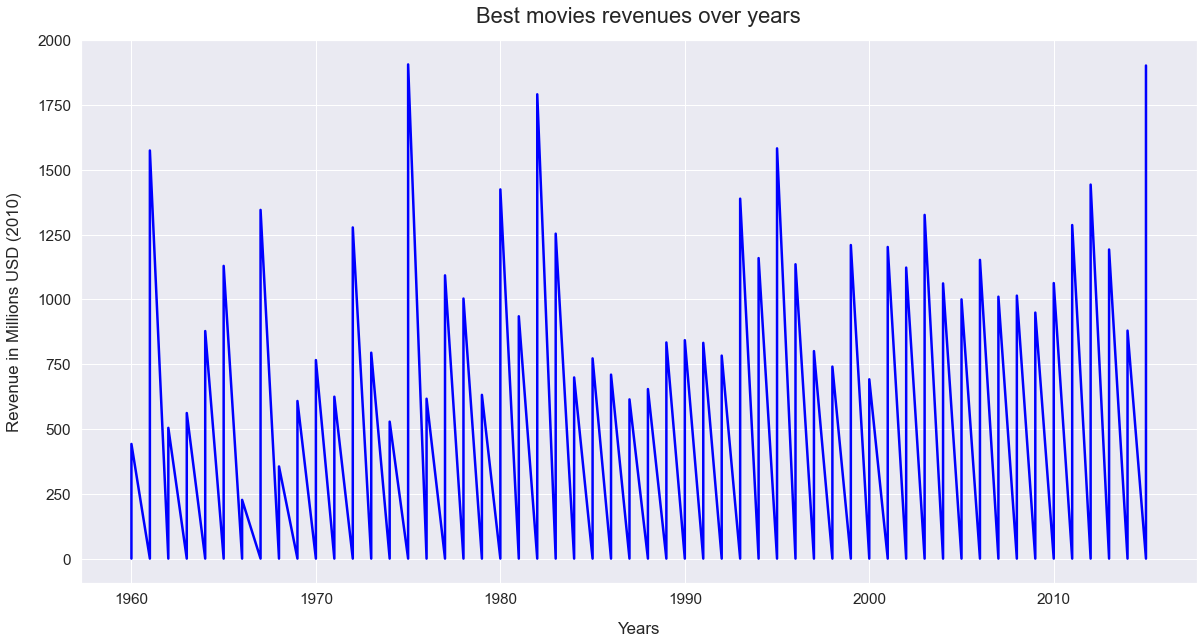

In [10]:
sns.set(font_scale=1.4)
temp_df.set_index('release_year')['revenue_in_millions'].plot(figsize=(20, 10), linewidth=2.5, color='blue')
plt.xlabel("Years", labelpad=15)
plt.ylabel("Revenue in Millions USD (2010)", labelpad=15)
plt.title("Best movies revenues over years", y=1.02, fontsize=22);

### Movie that made the most money

I also wanted to review which movie has made most of the money in my dataset

In [11]:
df.loc[df['revenue_in_millions'].idxmax()]

id                                                                    578
imdb_id                                                         tt0073195
popularity                                                        2.56319
original_title                                                       Jaws
cast                    Roy Scheider|Robert Shaw|Richard Dreyfuss|Lorr...
director                                                 Steven Spielberg
runtime                                                               124
genres                                          Horror|Thriller|Adventure
production_companies          Universal Pictures|Zanuck/Brown Productions
release_date                                                    6/18/1975
vote_count                                                           1415
vote_average                                                          7.3
release_year                                                         1975
budget_in_USD_2010                    

### Movie that made the less money

Which movie made less money

In [12]:
df.loc[df['revenue_in_millions'].idxmin()]

id                                                                 265208
imdb_id                                                         tt2231253
popularity                                                        2.93234
original_title                                                  Wild Card
cast                    Jason Statham|Michael Angarano|Milo Ventimigli...
director                                                       Simon West
runtime                                                                92
genres                                               Thriller|Crime|Drama
production_companies    Current Entertainment|Lionsgate|Sierra / Affin...
release_date                                                    1/14/2015
vote_count                                                            481
vote_average                                                          5.3
release_year                                                         2015
budget_in_USD_2010                    

<a id='q2'></a>
### Question 2: What's the genre that has more movies and which one is the genre that has the best votes?

- To do this I created a groupby of a new column named ```value``` which has all the genres from each movie and I grouped it with the variable ```revenue_in_millions```

In [13]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.
genres_revenue = df.groupby('value')["revenue_in_millions"].sum().sort_values(ascending = True)

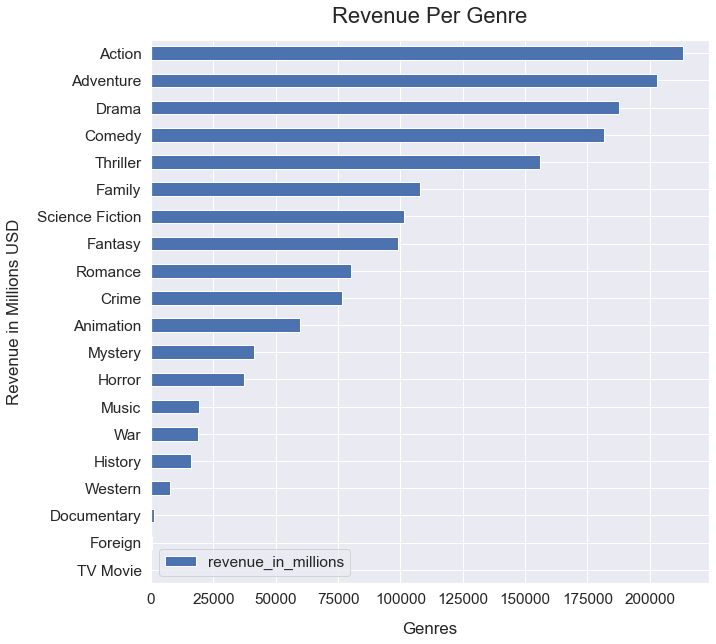

In [14]:
#Plotting the revenue for each genre
ax = genres_revenue.plot(kind = 'barh',figsize =(10,10), legend = True)
plt.title("Revenue Per Genre", y=1.02, fontsize=22)
plt.xlabel("Genres", labelpad=15)
plt.ylabel("Revenue in Millions USD", labelpad=15);

### Knowing which are the most popular genres
- I'm going to review which genres do better over the years, stayinng with just the top 5 genres.

In [15]:
genres_pop = df.groupby('value')["popularity"].sum().sort_values(ascending = False)
genres_pop

value
Drama              2809.748193
Comedy             2247.759649
Action             2187.363984
Thriller           2149.954098
Adventure          1676.444353
Science Fiction    1210.027791
Romance            1009.289249
Crime              1009.232253
Family              968.388793
Fantasy             900.008403
Horror              759.778071
Animation           595.674975
Mystery             558.909827
Music               198.827043
War                 196.474450
History             192.362605
Western              97.451554
Documentary          94.344445
TV Movie             45.239592
Foreign              36.001309
Name: popularity, dtype: float64

To **better understand** the data, I drop the genres that I don't want to track, I just want to see the top 8 genres.

In [17]:
test_df = pd.read_csv('clean_dataset - Copy.csv')
genre_over_time = test_df.drop(test_df.index[test_df['value'] == 'Horror'], inplace = True)
genre_over_time = test_df.drop(test_df.index[test_df['value'] == 'Animation'], inplace = True)
genre_over_time = test_df.drop(test_df.index[test_df['value'] == 'Mystery'], inplace = True)
genre_over_time = test_df.drop(test_df.index[test_df['value'] == 'Music'], inplace = True)
genre_over_time = test_df.drop(test_df.index[test_df['value'] == 'War'], inplace = True)
genre_over_time = test_df.drop(test_df.index[test_df['value'] == 'Western'], inplace = True)
genre_over_time = test_df.drop(test_df.index[test_df['value'] == 'Documentary'], inplace = True)
genre_over_time = test_df.drop(test_df.index[test_df['value'] == 'TV Movie'], inplace = True)
genre_over_time = test_df.drop(test_df.index[test_df['value'] == 'Foreign'], inplace = True)
genre_over_time = test_df.drop(test_df.index[test_df['value'] == 'Fantasy'], inplace = True)
genre_over_time = test_df.drop(test_df.index[test_df['value'] == 'Family'], inplace = True)
genre_over_time = test_df.drop(test_df.index[test_df['value'] == 'Crime'], inplace = True)

genre_over_time = test_df.groupby(['release_year','value'])['popularity'].mean()
genre_over_time

release_year  value          
1960          Action             0.590724
              Adventure          0.700981
              Comedy             0.396000
              Drama              0.566305
              History            0.412364
                                   ...   
2015          Drama              0.937877
              History            1.007905
              Romance            0.948865
              Science Fiction    2.245603
              Thriller           1.401877
Name: popularity, Length: 445, dtype: float64

In [18]:
newdf = genre_over_time.unstack()
newdf.head(2)

value,Action,Adventure,Comedy,Drama,History,Romance,Science Fiction,Thriller
release_year,,,,,,,,
1960,0.590724,0.700981,0.396000,0.566305,0.412364,0.541227,0.327905,0.81191
1961,0.365913,0.767323,0.679838,0.432233,0.334463,0.426036,0.274103,NaN


Text(0, 0.5, 'avg popularity')

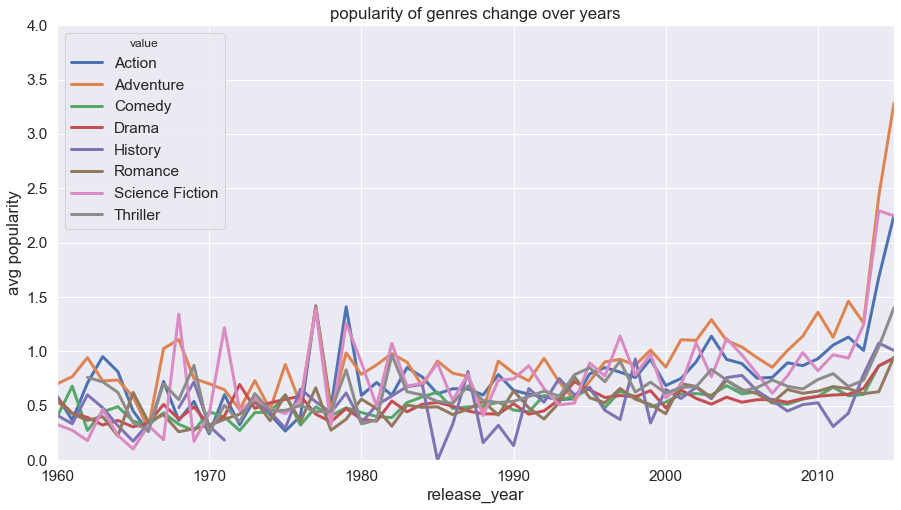

In [19]:
newdf.plot(figsize= (15,8), linewidth=3, xlim = (1960,2015), ylim = (0,4))
plt.title('popularity of genres change over years')
plt.ylabel('avg popularity')

<a id='q3'></a>
### Question 3: Average Revenue per Genre from 1960-2018

> Revenue per Genre, in order to do this I created a groupby function between ```value``` and ```revenue_in_millions```

In [20]:
genres_avg_revenue = df.groupby('value')["revenue_in_millions"].mean().sort_values(ascending = True)

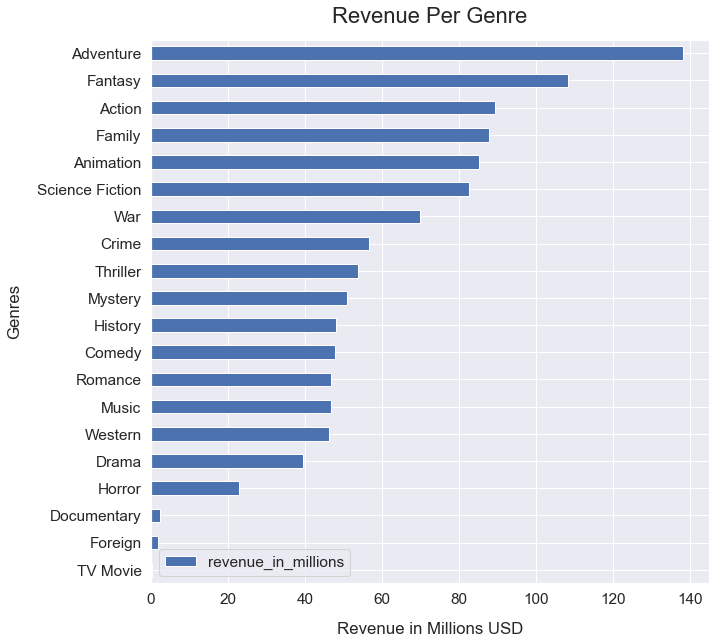

In [21]:
ax = genres_avg_revenue.plot(kind = 'barh',figsize =(10,10), legend = True)
plt.title("Revenue Per Genre", y=1.02, fontsize=22)
plt.xlabel("Revenue in Millions USD", labelpad=15)
plt.ylabel("Genres", labelpad=15);

<a id='q4'></a>
### Question 4: Correlations between revenue and budget

- To create this correlation, I first filter where all the values from ```revenue_in_millions``` are positive, because the negative values bias the visualization. 

In [22]:
correlation = df[(df['revenue_in_millions'] >= 0)]
correlation.revenue_in_millions

0        1392.445893
1         348.161292
2         271.619025
3        1902.723130
4        1385.748801
            ...     
54210       0.000000
54211       0.000000
54212       0.000000
54213       0.000000
54214       0.000000
Name: revenue_in_millions, Length: 54195, dtype: float64

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


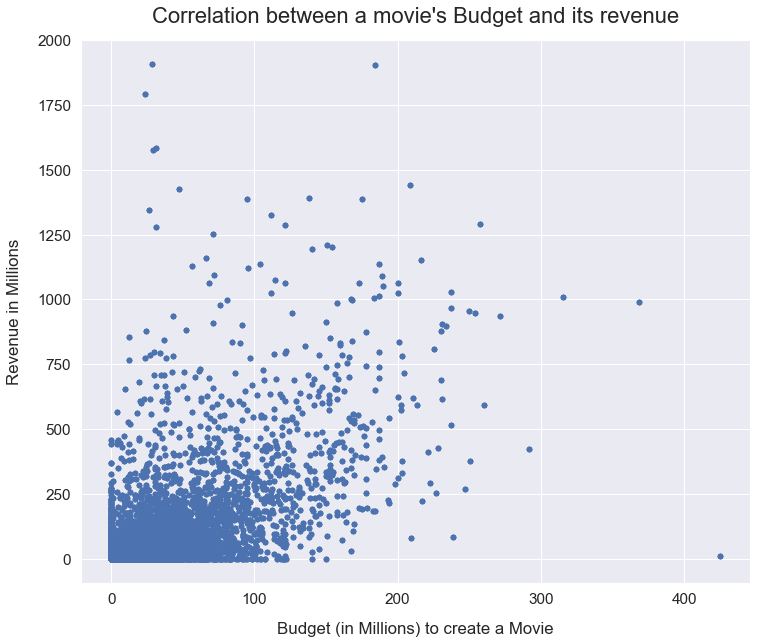

In [23]:
df.plot(x='budget_in_millions', y='revenue_in_millions', kind = 'scatter', figsize = (12,10))
plt.title("Correlation between a movie's Budget and its revenue", y=1.02, fontsize=22)
plt.xlabel("Budget (in Millions) to create a Movie", labelpad=15)
plt.ylabel("Revenue in Millions", labelpad=15);

### Correlation between a Movie's Budget and its Popularity

- We can see that there is a positive relationship between this 2 variables. 

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


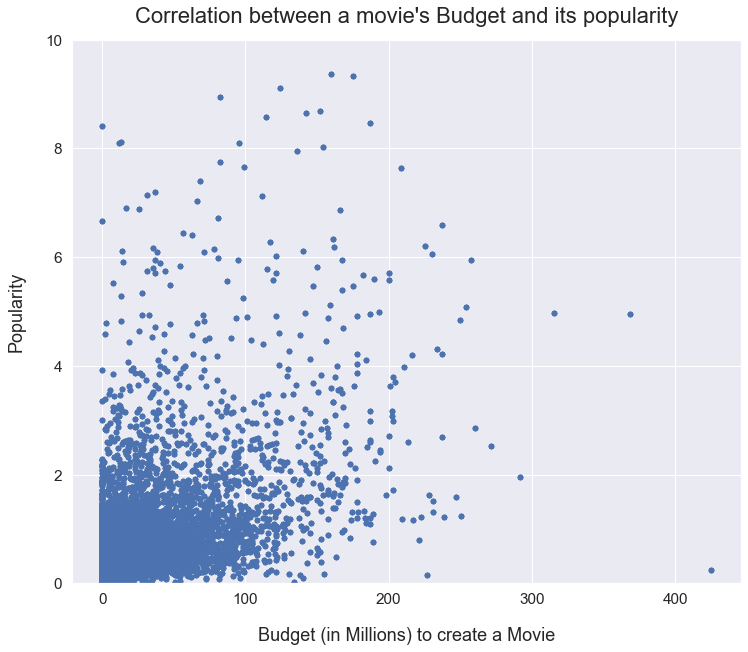

In [37]:
df.plot(x='budget_in_millions', y='popularity', kind = 'scatter', figsize = (12,10), ylim = (0,10))
plt.title("Correlation between a movie's Budget and its popularity", y=1.02, fontsize=22)
plt.xlabel("Budget (in Millions) to create a Movie", labelpad=20, fontsize = 18)
plt.ylabel("Popularity", labelpad=20, fontsize = 18);

<a id='conclusions'></a>
## Conclusions

> As I analyzed this dataset, I found out that the better the budget, **the better** the chances for the movie to be more popular. I think is also important to get to know what are the correlations 